In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read all data from results directory
import os
import glob

# Get all subdirectories in the results directory
result_dirs = glob.glob('phoebe_lc_check/results/incl_*_period_*')

data = []

for dir_path in result_dirs:
    # Extract inclination and period from directory name
    incl, period = map(float, dir_path.split('/')[-1].replace('incl_', '').replace('period_', '').split('_'))
    
    # Read max_residuals.csv file
    csv_path = os.path.join(dir_path, 'max_residuals.csv')
    if os.path.exists(csv_path):
        with open(csv_path, 'r') as f:
            next(f)  # Skip header
            for line in f:
                filter_name, max_residual = line.strip().split(',')
                data.append({
                    'Inclination': incl,
                    'Period': period,
                    'Filter': filter_name,
                    'Max Residual': float(max_residual)
                })

# Create DataFrame
results_df = pd.DataFrame(data)

# Sort the DataFrame
results_df = results_df.sort_values(['Inclination', 'Period', 'Filter'])

# Display the first few rows
print(results_df.head())



     Inclination  Period                Filter  Max Residual
159          0.0     1.0  Bolometric:900-40000           0.0
158          0.0     1.0                Gaia:G           0.0
155          0.0     1.0             Johnson:U           0.0
156          0.0     1.0             Johnson:V           0.0
157          0.0     1.0           Stromgren:v           0.0


In [4]:
lc = np.loadtxt('/Users/mjablons/Documents/stellar-mesh-integration/tutorial/paper_results/phoebe_lc_check/results/incl_90.00_period_91.00/Gaia:G.txt')

In [5]:
lc

array([0.00000000e+00, 4.48816539e-11, 2.38262299e-10, 5.63781799e-10,
       1.00091024e-09, 1.55871460e-09, 2.22100160e-09, 2.97204517e-09,
       3.81278742e-09, 4.71583583e-09, 5.66846037e-09, 6.67118905e-09,
       7.69390252e-09, 8.71652850e-09, 9.73479541e-09, 1.07256749e-08,
       1.16698065e-08, 1.25586577e-08, 1.33803788e-08, 1.41084624e-08,
       1.47481164e-08, 1.52762123e-08, 1.56829103e-08, 1.59826563e-08,
       1.61358277e-08, 1.61780200e-08, 1.60752468e-08, 1.58509381e-08,
       1.54893193e-08, 1.50330849e-08, 1.44405390e-08, 1.37575518e-08,
       1.29748462e-08, 1.21258869e-08, 1.12079164e-08, 1.02416974e-08,
       9.23003673e-09, 8.20929014e-09, 7.17875193e-09, 6.17131501e-09,
       5.19709931e-09, 4.26151558e-09, 3.39070427e-09, 2.59418553e-09,
       1.87208471e-09, 1.26155009e-09, 7.67613639e-10, 3.86404686e-10,
       1.20476074e-10, 9.12159237e-12, 4.62119232e-12, 1.25428667e-10,
       3.84788312e-10, 7.65734587e-10, 1.26371325e-09, 1.88038418e-09,
      

In [6]:
results_df['Filter'].unique()


array(['Bolometric:900-40000', 'Gaia:G', 'Johnson:U', 'Johnson:V',
       'Stromgren:v'], dtype=object)

In [21]:
import cmasher as cmr

def plot_for_filter(filter_name):
    filtered_df = results_df[results_df['Filter'] == filter_name]

    cmap = cmr.bubblegum

    # Filter for specific periods and inclinations
    selected_periods = np.arange(1, 92, 10)  # 1 to 91 every 10
    selected_inclinations = np.arange(0, 91, 10)  # 0 to 90 every 10

    # Filter the DataFrame
    filtered_df = filtered_df[
        filtered_df['Period'].isin(selected_periods) & 
        filtered_df['Inclination'].isin(selected_inclinations)
    ]

    # Create a pivot table for the filtered data
    pivot_table = filtered_df.pivot(index='Inclination', columns='Period', values='Max Residual')

    # Create a heatmap
    plt.figure(figsize=(12, 8))
    heatmap = plt.imshow(pivot_table, cmap=cmap, aspect='auto', interpolation='nearest',
                        extent=[min(pivot_table.columns)-5., max(pivot_table.columns)+5.,
                                max(pivot_table.index)+5., min(pivot_table.index)-5.])

    # Add colorbar
    plt.colorbar(heatmap, label='Max Residual [mag]')

    # Set labels and title
    plt.xlabel('Period (days)')
    plt.ylabel('Inclination (degrees)')
    plt.title(f'Max Residual for {filter_name} Filter')

    # Set x and y ticks with proper formatting
    plt.xticks(pivot_table.columns, rotation=45)
    plt.yticks(pivot_table.index)

    # Add text annotations in each cell with conditional text color
    for i, incl in enumerate(pivot_table.index):
        for j, period in enumerate(pivot_table.columns):
            value = pivot_table.loc[incl, period]
            text_color = 'white'
            # Format small values using scientific notation
            if abs(value) < 0.000001:
                formatted_value = f'{value:.2e}'
            else:
                formatted_value = f'{value:.6f}'
            plt.text(period, incl, formatted_value, 
                    ha='center', va='center', color=text_color, fontweight='bold', fontsize=8,
                    bbox=dict(facecolor='none', edgecolor='none', pad=2))

    # Adjust layout with more padding
    plt.tight_layout(pad=2.0)

    # Save the figure
    plt.savefig(f'{filter_name.replace(":", "_")}_max_residuals.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


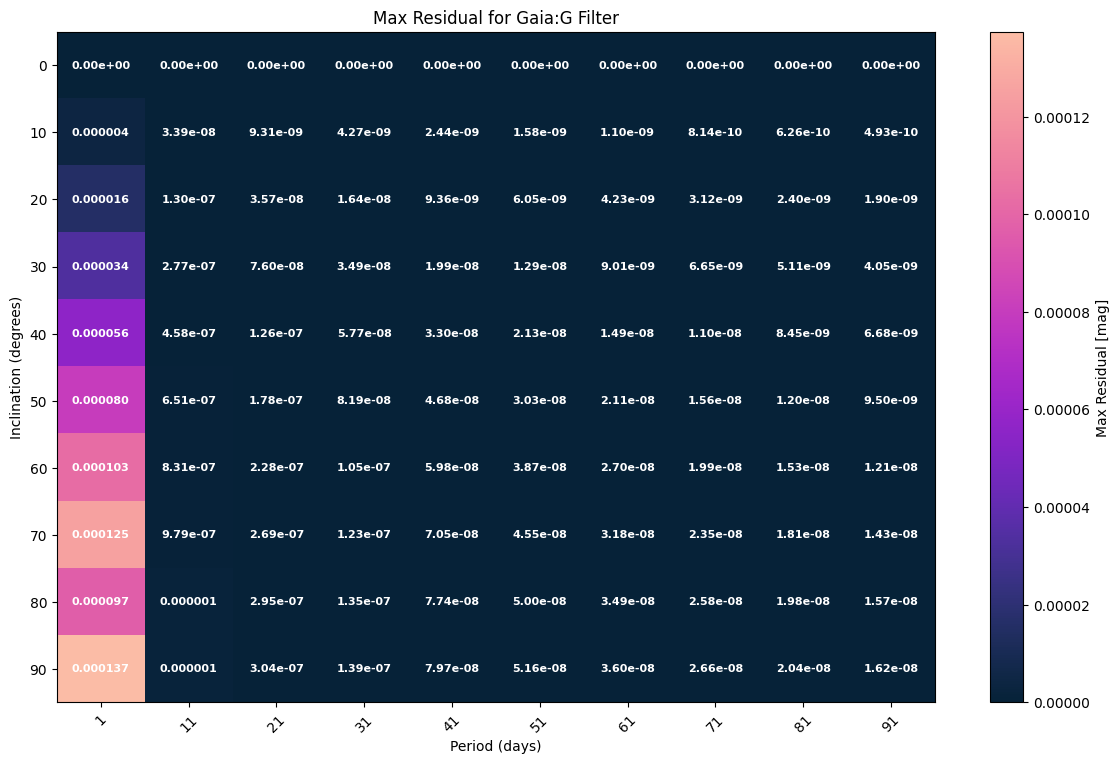

In [22]:
plot_for_filter('Gaia:G')

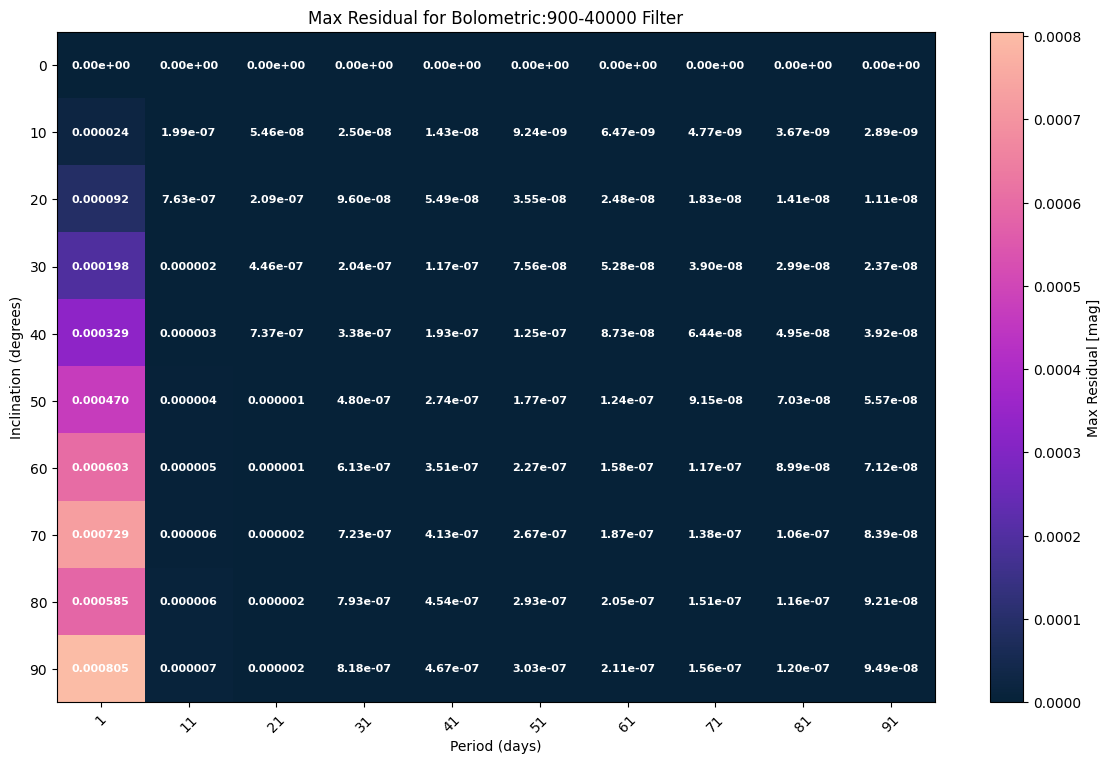

In [23]:
plot_for_filter('Bolometric:900-40000')

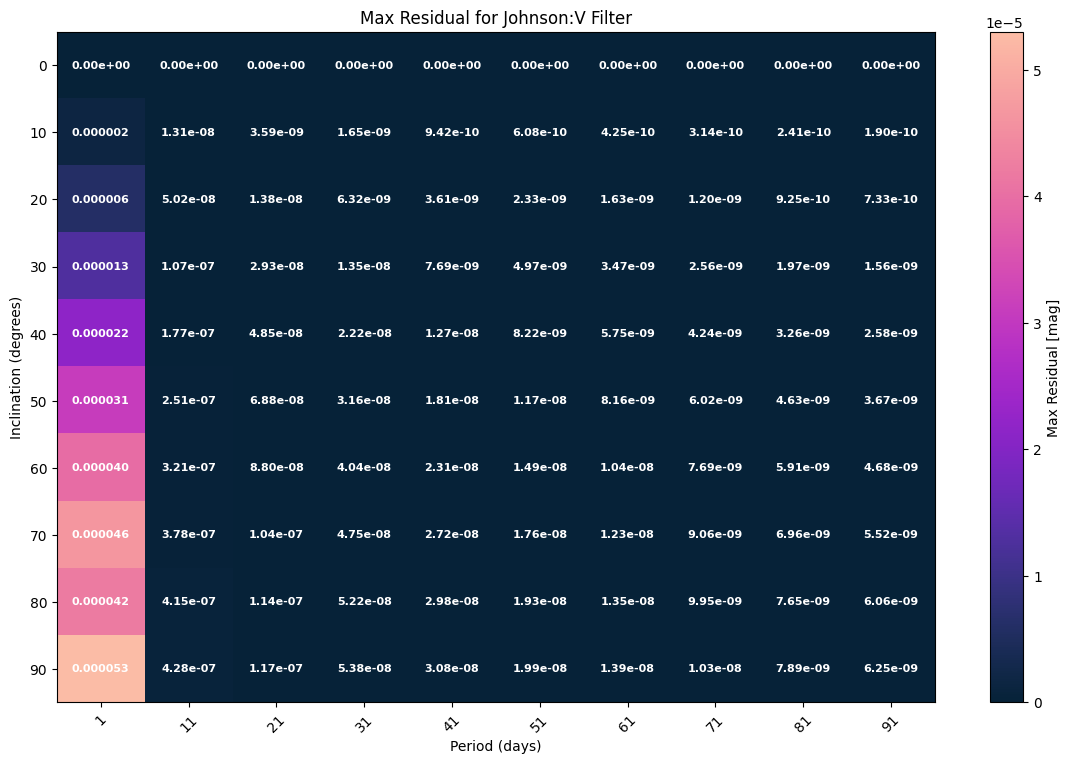

In [24]:
plot_for_filter('Johnson:V')

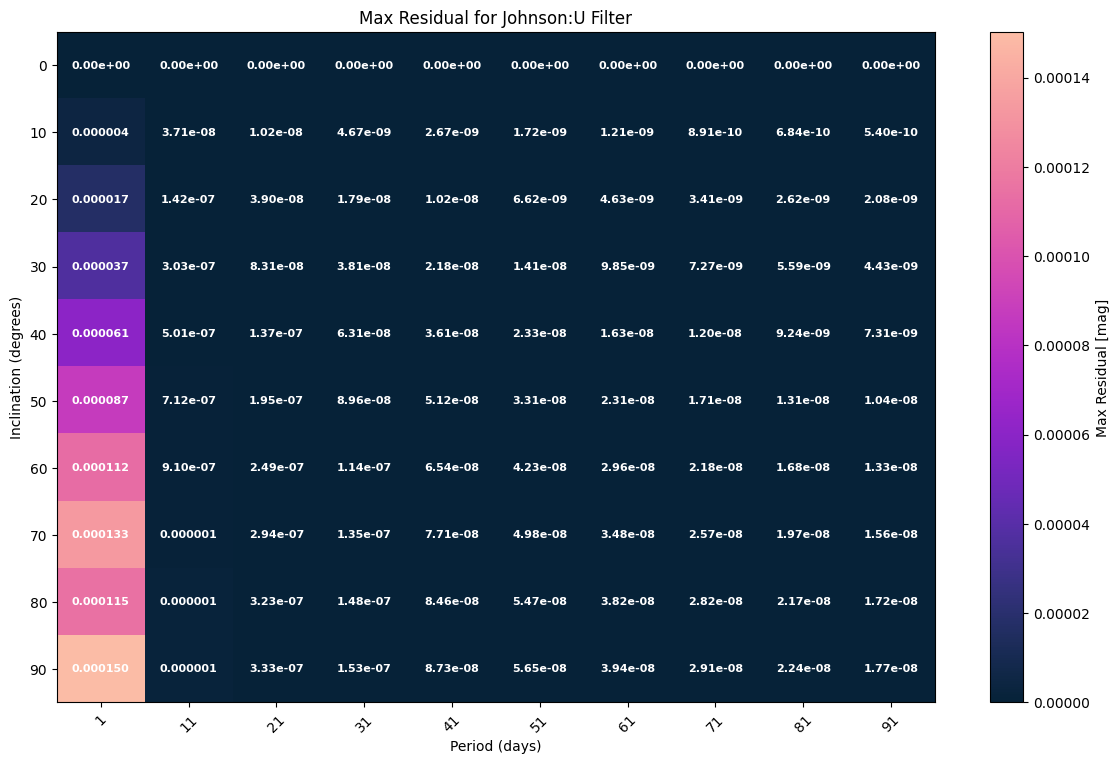

In [25]:
plot_for_filter('Johnson:U')

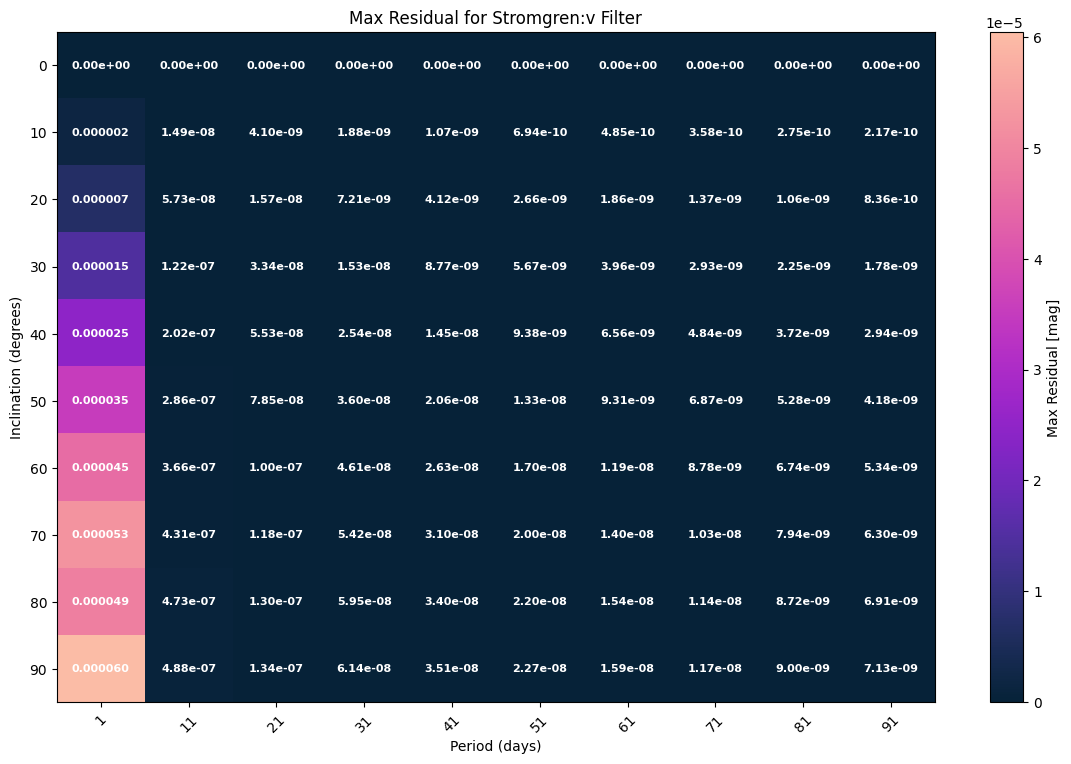

In [26]:
plot_for_filter('Stromgren:v')

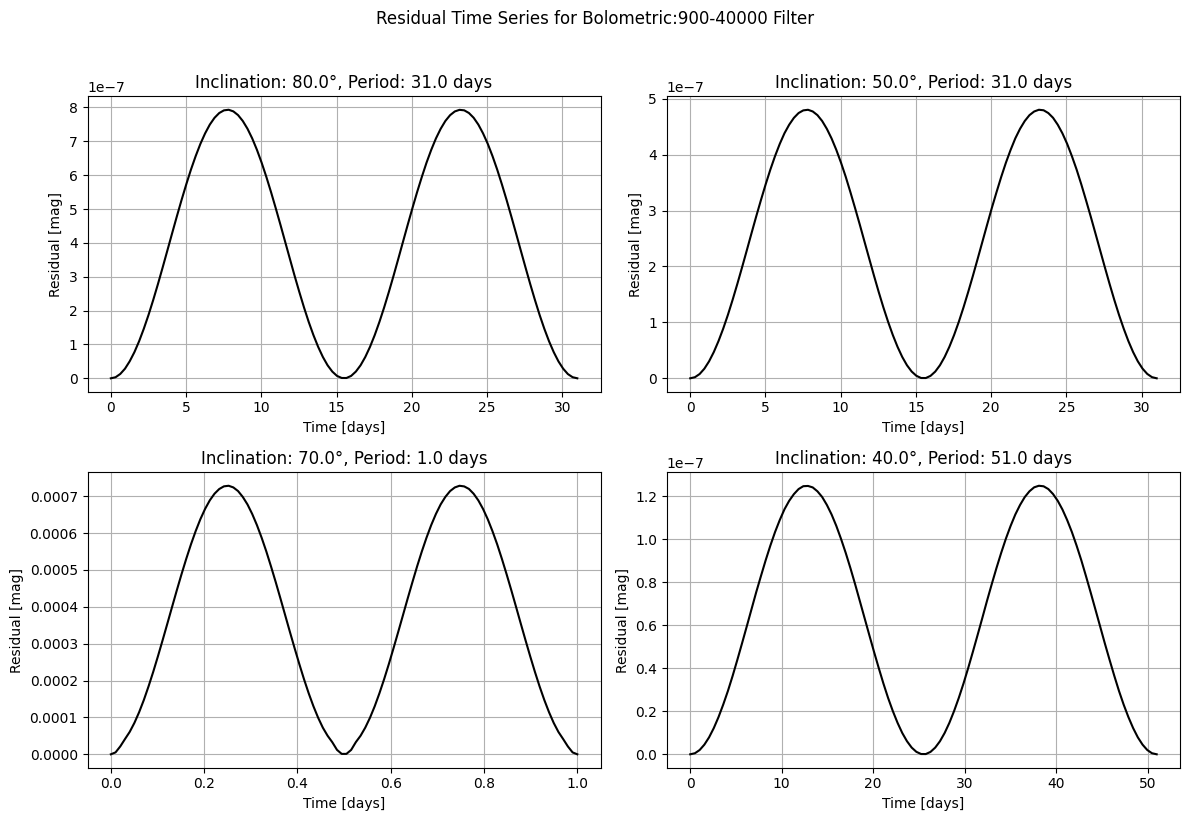

In [30]:
# Select a filter to analyze
selected_filter = 'Bolometric:900-40000'

# Get unique inclination and period combinations for the selected filter
filter_df = results_df[results_df['Filter'] == selected_filter]
unique_combinations = filter_df[['Inclination', 'Period']].drop_duplicates()

# Select a few combinations to plot
sample_combinations = unique_combinations.sample(n=4, random_state=42)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f'Residual Time Series for {selected_filter} Filter', y=1.02)

# Plot each combination
for idx, (_, row) in enumerate(sample_combinations.iterrows()):
    incl = row['Inclination']
    period = row['Period']
    
    # Construct file path
    folder_name = f"phoebe_lc_check/results/incl_{int(incl)}.00_period_{int(period)}.00"
    file_path = os.path.join(folder_name, f'{selected_filter}.txt')
    
    # Read the data
    try:
        data = np.loadtxt(file_path)
        residuals = data
        
        # Plot
        ax = axes[idx//2, idx%2]
        time = np.linspace(0, period, 100)
        ax.plot(time, residuals, color='black')
        ax.set_title(f'Inclination: {incl}°, Period: {period} days')
        ax.set_xlabel('Time [days]')
        ax.set_ylabel('Residual [mag]')
        ax.grid(True)
    except FileNotFoundError:
        print(f"File not found: {file_path}")

plt.tight_layout()
plt.show()
